In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt



In [6]:
#generating synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

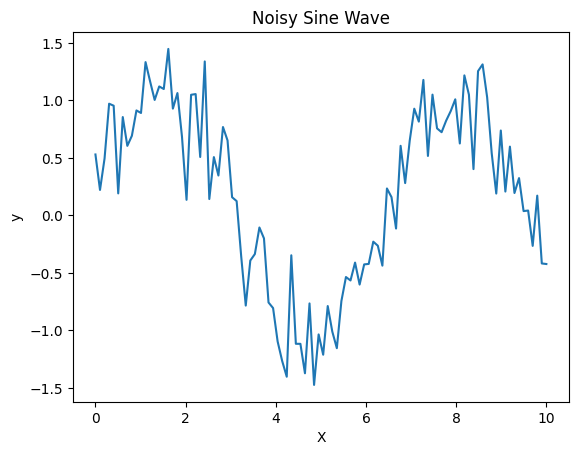

In [7]:
#visualising
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Noisy Sine Wave')
plt.show()

In [8]:
# Local Weighted Regression function
def local_weighted_regression(X, y, query_point, tau):
    """
    Perform Local Weighted Regression.
    
    Parameters:
    X : numpy array
        Feature matrix.
    y : numpy array
        Target values.
    query_point : float
        The point at which we want to predict the value.
    tau : float
        The bandwidth parameter (controls the width of the local window).
    
    Returns:
    float
        The predicted value at the query_point.
    """
    # Number of data points
    m = X.shape[0]
    
    # Create weight matrix
    weights = np.exp(-((X - query_point) ** 2) / (2 * tau ** 2))
    
    # Weighted X and y
    W = np.diag(weights)
    X_ = np.vstack([np.ones(m), X]).T
    
    # Compute theta using the normal equation
    theta = np.linalg.pinv(X_.T @ W @ X_) @ X_.T @ W @ y
    
    # Predict the value at the query point
    query_X = np.array([1, query_point])
    return query_X @ theta

In [9]:
tau = 1.0
query_points = np.linspace(0, 10, 100)
predictions = np.array([local_weighted_regression(X, y, q, tau) for q in query_points])


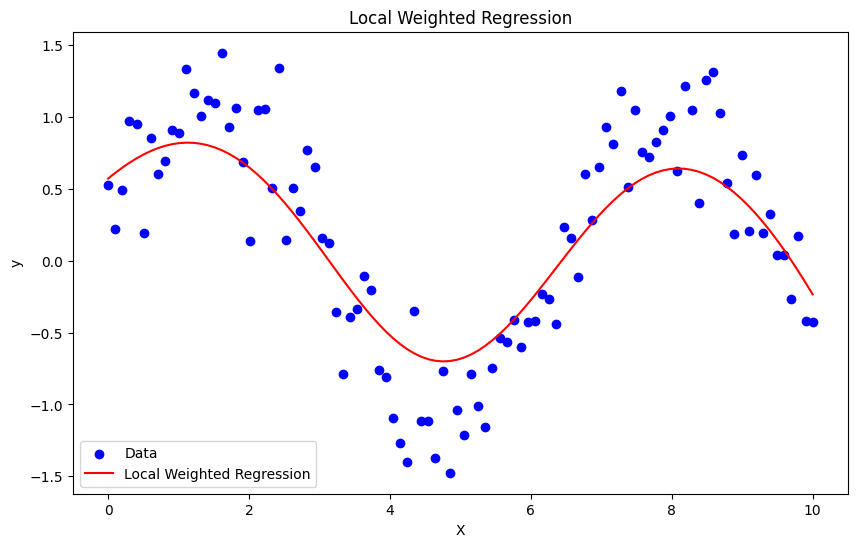

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(query_points, predictions, color='red', label='Local Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Local Weighted Regression')
plt.legend()
plt.show()